## Download data  

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 23.3MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 13.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## Tiền xử lý dữ liệu dạng table

### Lấy label và chia bộ dữ liệu train/val

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### Chuẩn hóa dữ liệu (Data Standardisation)

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### MLP for Regressuion - MAE (Optional)

In [ ]:
#
MAE_MLP_Regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=[9], activation="relu"),
    tf.keras.layers.Dense(units=64,  activation="relu"),
    tf.keras.layers.Dense(units=1)
])
MAE_MLP_Regression_model.summary()
#
opt = tf.keras.optimizers.SGD(learning_rate=0.03)
MAE_MLP_Regression_model.compile(optimizer=opt,loss="mae",
                             metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanSquaredError()])

#
# MAE_MLP_Regression_history = MAE_MLP_Regression_model.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=100, validation_split = 0.2)
MAE_MLP_Regression_history = MAE_MLP_Regression_model.fit( X_train, y_train, validation_data=(X_val, y_val) ,epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 22.6985 - r_square: -8.6601 - mean_squared_error: 575.1826 - val_loss: 22.2440 - val_r_square: -7.5926 - val_mean_squared_error: 561.1533
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 19.8244 - r_square: -6.7023 - m

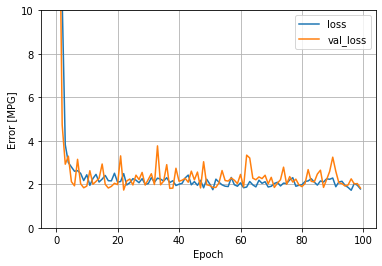

In [ ]:
plt.plot(MAE_MLP_Regression_history.history['loss'], label='loss')
plt.plot(MAE_MLP_Regression_history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MAE_MLP_Regression_history.history)
hist['epoch'] = MAE_MLP_Regression_history.epoch
hist.tail()

,loss,r_square,mean_squared_error,val_loss,val_r_square,val_mean_squared_error,epoch
95,1.856694,0.894751,6.266716,1.971186,0.903867,6.278121,95
96,1.726394,0.892997,6.371141,2.251581,0.877219,8.018415,96
97,2.036915,0.870767,7.694765,2.016547,0.896249,6.775657,97
98,1.957581,0.866668,7.938863,2.034491,0.875656,8.120494,98
99,1.787025,0.888910,6.614509,1.829754,0.904547,6.233740,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MSE: ", min(hist['mean_squared_error']))
print("Min val MSE: ", min(hist['val_mean_squared_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  1.7263944149017334
Min val loss:  1.7362674474716187
Min MSE:  6.266716480255127
Min val MSE:  5.843018531799316
Max r-squared loss:  0.8947510719299316
Max val r-squared loss:  0.910529613494873


In [ ]:
# Max val r-squared loss:  0.910529613494873
